# Heatmap

## Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import zipfile
import numpy as np

In [2]:
cv2.__version__

'4.10.0'

## Extracting files

In [3]:
pose_path = "pose.zip"
zip_object = zipfile.ZipFile(file = pose_path, mode = "r") 
zip_object.extractall("./")

## Defining the path to the models

In [4]:
#Architecture of the neural network
proto_files = "pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt"

#The weights of the neural network
weights_file = "pose/body/mpi/pose_iter_160000.caffemodel"

## Defining the number of points and the pairs of points

In [5]:
number_of_points = 15
pairs = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7],[1,14],
               [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [6]:
point_color, line_color = (255, 128, 0), (7, 62, 248)

## Loading an image

In [7]:
img = cv2.imread("raissa.jpg")

In [8]:
img.shape

(720, 984, 3)

In [9]:
cv2.imshow('people', img)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()  # Close the window

In [10]:
copy = np.copy(img)

In [11]:
height = img.shape[0]
width = img.shape[1]

## Loading the model

In [12]:
model = cv2.dnn.readNetFromCaffe(proto_files, weights_file)

## Changing the size of the image

In [15]:
new_height = 256
new_width = int((new_height/height)*width)

In [16]:
new_width

349

## Converting the imate from cv2 to blob Caffe

In [17]:
blob_entry = cv2.dnn.blobFromImage(image = img, scalefactor = 1.0/255,
                                    size = (new_width, new_height),
                                    mean = (0,0,0), swapRB = False, crop = False)

## Output

In [18]:
model.setInput(blob_entry)
output = model.forward()

In [19]:
output.shape

(1, 44, 32, 44)

In [20]:
output[0].shape

(44, 32, 44)

## Confidence Map

In [21]:
point = 0 #head
confidence_map = output[0, point, :]
confidence_map = cv2.resize(confidence_map, (width, heigth))

NameError: name 'heigth' is not defined

In [ ]:
plt.figure(figsize = [7,5])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(confidence_map, alpha = 0.6)
plt.axis("off")

## Afinity Map

In [ ]:
point = 16 # afinity between head and neck
confidence_map = output[0, point, :]
confidence_map = cv2.resize(confidence_map, (width, heigth))

In [ ]:
plt.figure(figsize = [7,5])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(confidence_map, alpha = 0.6)
plt.axis("off")

## Plotting the output

In [24]:
height_ = output.shape[2]
width_ = output.shape[3]

In [25]:
points = []
threshold = 0.1

for i in range(number_of_points):
  confidence_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  #print(confidence)
  #print(point)

  x = (width * point[0]) / width_
  y = (height * point[1]) / height_

  if confidence > threshold:
    cv2.circle(copy, (int(x), int(y)), 8, point_color, thickness = -1,
              lineType=cv2.FILLED)
    cv2.putText(copy, "{}".format(i), (int(x), int(y)),
               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3,
               lineType=cv2.LINE_AA)
    points.append((int(x), int(y)))
  else:
    points.append(None)

## Creating a mask for draw the skeleton

In [27]:
size = cv2.resize(img, (width, height))
blur_map = cv2.GaussianBlur(size, (3,3), 0, 0)
mask_map = np.uint8(blur_map > threshold)

In [28]:
for pair in pairs:

  p1 = pair[0]
  p2 = pair[1]

  if points[p1] and points[p2]:
    cv2.line(img, points[p1], points[p2], line_color, 3)
    cv2.circle(img, points[p1], 8, point_color, thickness = -1,
              lineType = cv2.LINE_AA)

    cv2.line(mask_map, points[p1], points[p2], line_color, 3)
    cv2.circle(mask_map, points[p1], 8, point_color, thickness = -1,
              lineType = cv2.LINE_AA)

## Results

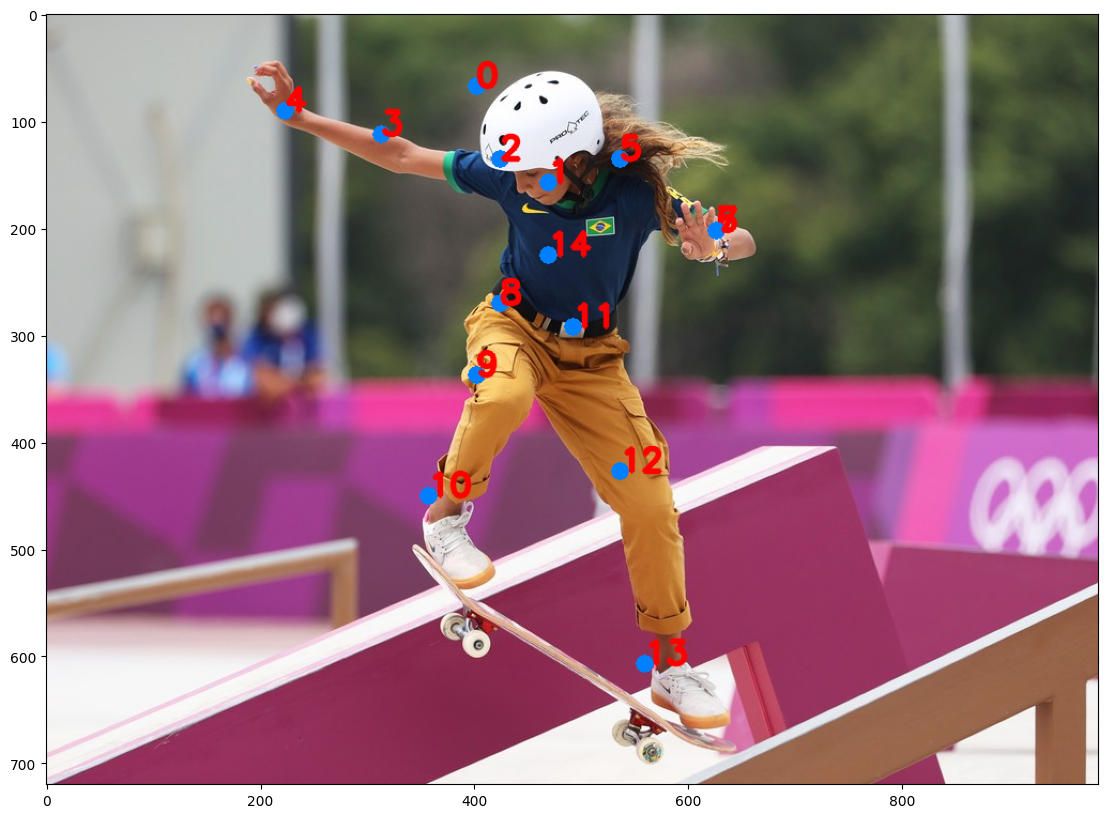

In [29]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

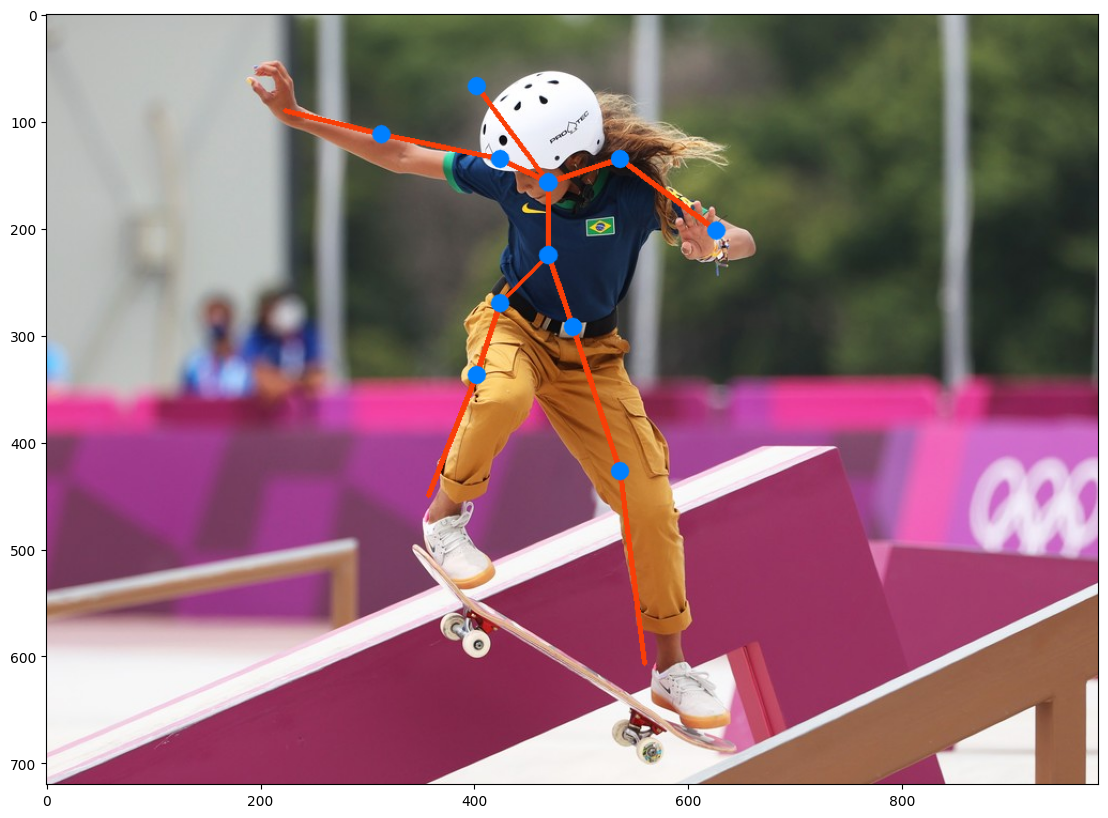

In [30]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

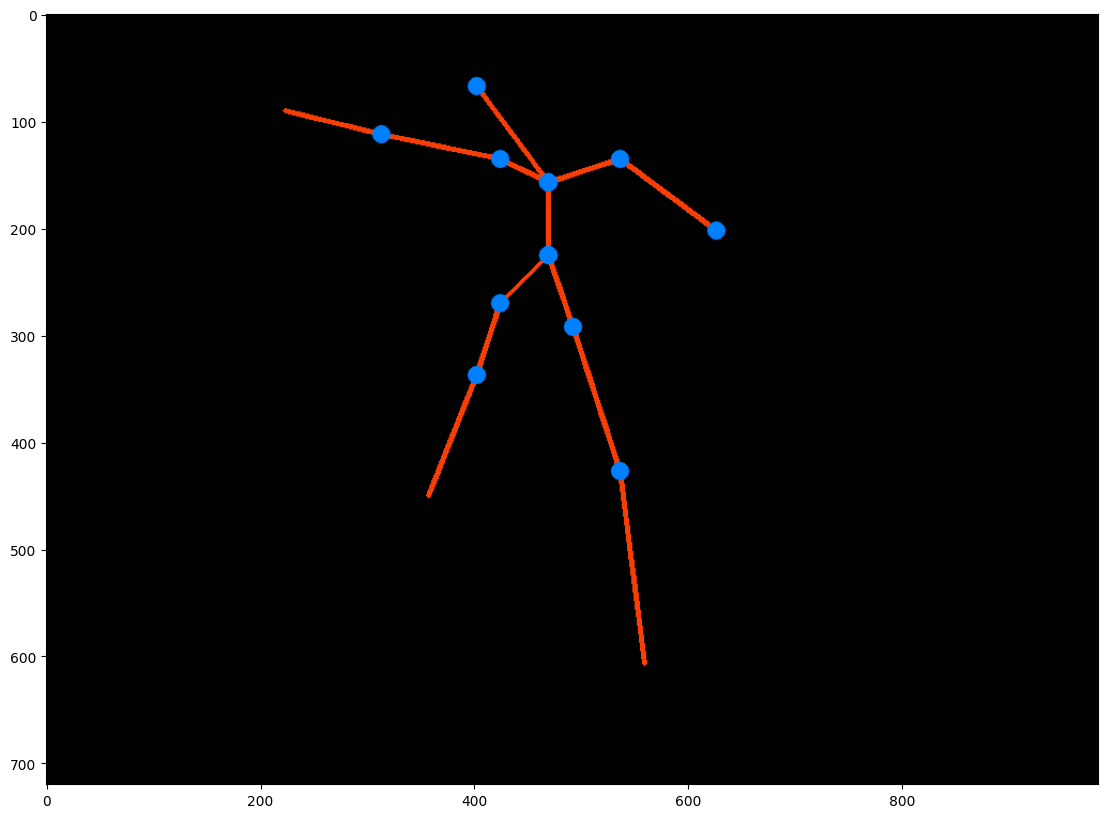

In [31]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(mask_map, cv2.COLOR_BGR2RGB))